In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
records = pd.read_csv('../../data/fucking_final_dataset.csv')
records = records[records.pub_year > 1499]
records = records[records.pub_year < 1600]

In [4]:
records.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,Unnamed: 0.1.1,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,title_auth_slug,canonical_title,canonical_author,slug,canonical_city,canonical_country,full_text_slug
571,571,670,670,670,14321112,libro de proprietatibus rerum en romancehystor...,NaN,bartholomaeus,"gaspar de avila, a costa de joan thomas fabio",toledo,1529,NaN,NaN,libro de proprietatibus rerum en romancehystor...,libro de proprietatibus rerum en romancehystor...,bartholomaeus,"toledo,spain",toledo,spain,libro de proprietatibus rerum en romancehystor...


In [5]:
len(records)

15127

In [6]:
plt.rcParams['figure.figsize'] = (16.0, 8.0)

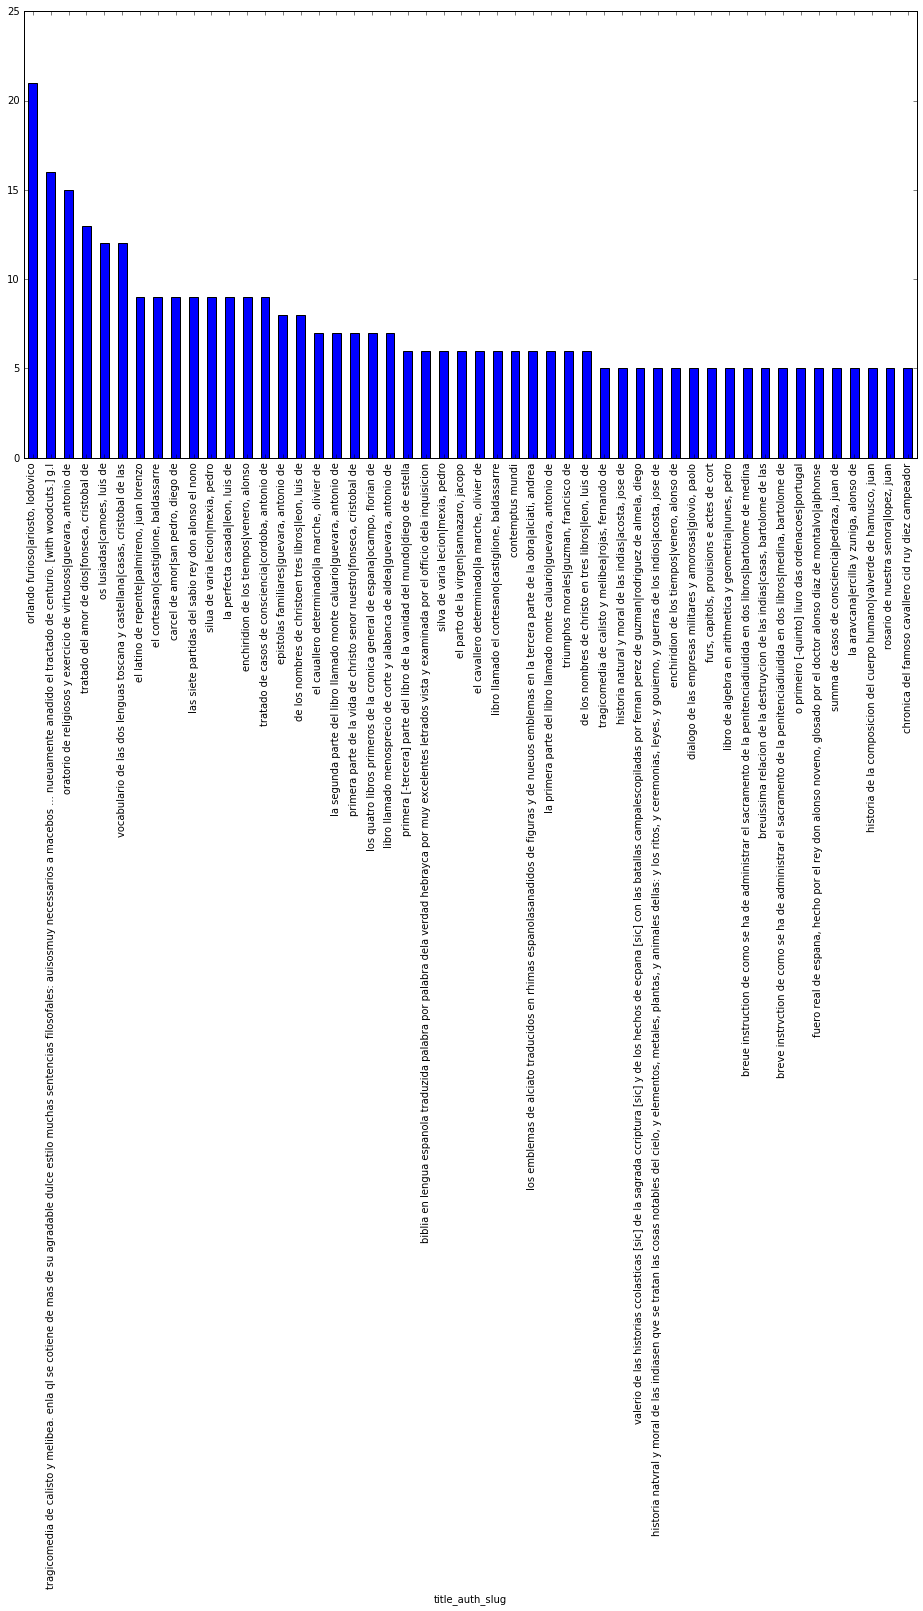

In [8]:
records.groupby('title_auth_slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:50].plot(kind="bar")

In [10]:
len(records.groupby('title_auth_slug').count()['control_number'])

13823

In [11]:
d = {k: len(v) for k, v in records.groupby("title_auth_slug").groups.items()}

def prob_dist(d):
    probs = {}
    for k, v in d.items():
        probs.setdefault(v, 0)
        probs[v] += 1
    return probs


probs = prob_dist(d)

In [12]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

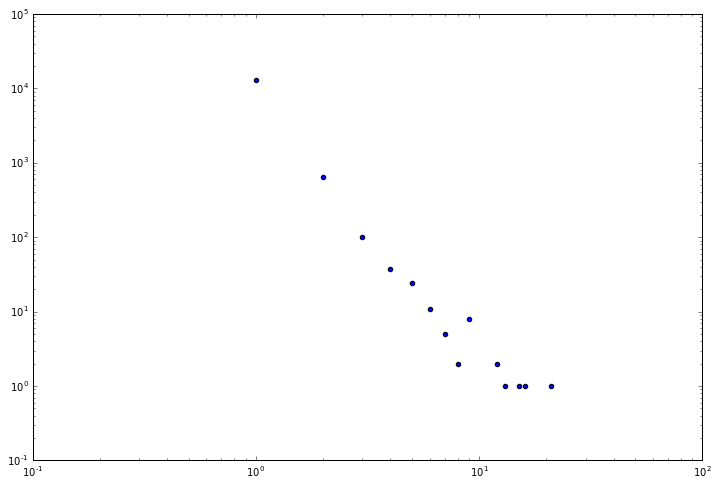

In [13]:
plt.xscale("log")
plt.yscale("log")
plt.scatter(list(probs.keys()), list(probs.values()))

In [14]:
top_slugs = records.groupby('title_auth_slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].index

In [15]:
top_slugs

Index(['orlando furioso|ariosto, lodovico',
       'tragicomedia de calisto y melibea. enla ql se cotiene de mas de su agradable dulce estilo muchas sentencias filosofales: auisosmuy necessarios a macebos ... nueuamente anadido el tractado de centurio. [with woodcuts.] g.l',
       'oratorio de religiosos y exercicio de virtuosos|guevara, antonio de',
       'tratado del amor de dios|fonseca, cristobal de',
       'os lusiadas|camoes, luis de',
       'vocabulario de las dos lenguas toscana y castellana|casas, cristobal de las',
       'el latino de repente|palmireno, juan lorenzo',
       'el cortesano|castiglione, baldassarre',
       'carcel de amor|san pedro, diego de',
       'las siete partidas del sabio rey don alonso el nono'],
      dtype='object', name='title_auth_slug')

In [13]:
top_producers = records[records.text_slug.isin(top_slugs)]

In [14]:
group_top_producers = top_producers.sort_values('pub_year').groupby(['text_slug', 'pub_year']).count()['control_number']

In [15]:
top_producer_df1 = pd.DataFrame({
    'tratado del amor de dios,fonseca, cristobal de': group_top_producers.ix['tratado del amor de dios,fonseca, cristobal de'],
    'la perfecta casada,leon, luis de': group_top_producers.ix['la perfecta casada,leon, luis de'],
    'breuissima relacion de la destruycion de las indias,casas, bartolome de las': group_top_producers.ix['breuissima relacion de la destruycion de las indias,casas, bartolome de las'],
    'de los nombres de christoen tres libros,leon, luis de': group_top_producers.ix['de los nombres de christoen tres libros,leon, luis de'],
    'vocabulario en lengua castellana y mexicana,molina, alonso de': group_top_producers.ix['vocabulario en lengua castellana y mexicana,molina, alonso de'],
    'orlando furioso,ariosto, lodovico': group_top_producers.ix['orlando furioso,ariosto, lodovico'],
    'arte de la lengua mexicana y castellana,molina, alonso de': group_top_producers.ix['arte de la lengua mexicana y castellana,molina, alonso de'],
    'las siete partidas del sabio rey don alonso el nono,nan': group_top_producers.ix['las siete partidas del sabio rey don alonso el nono,nan'],
    'tragicomedia de calisto y melibea': group_top_producers.ix['tragicomedia de calisto y melibea. enla ql se cotiene de mas de su agradable dulce estilo muchas sentencias filosofales: auisosmuy necessarios a macebos ... nueuamente anadido el tractado de centurio. [with woodcuts.] g.l,nan'],
    'oratorio de religiosos y exercicio de virtuosos,guevara, antonio de': group_top_producers.ix['oratorio de religiosos y exercicio de virtuosos,guevara, antonio de'],
    }).fillna(0)

KeyError: 'breuissima relacion de la destruycion de las indias,casas, bartolome de las'

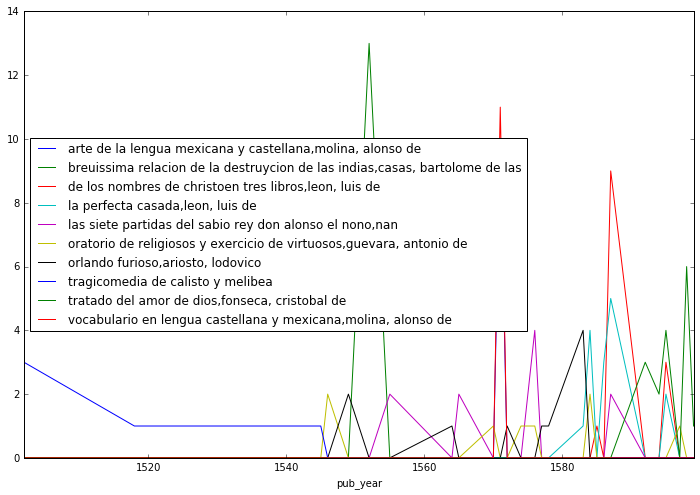

In [20]:
top_producer_df1.plot()

In [ ]:
top_producer_df5 = pd.DataFrame({
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
}).fillna(0)